In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:

# read the AirBnB csv file into pandas, change all the addresses to be upper case to later match city data
airbnb_list = pd.read_csv('data/cville_airbnb_locations.csv')
airbnb_list['address'] = airbnb_list['address'].str.upper()


In [3]:
# read the city parcel data with geopandas, make a column for full address by combining Street Numer and Street Name making sure to put space in middle
cville_parcels = gpd.read_file('https://opendata.arcgis.com/datasets/0e9946c2a77d4fc6ad16d9968509c588_72.geojson')
cville_parcels['fulladdress'] = cville_parcels.StreetNumber+' '+cville_parcels.StreetName


           address                                   link          type  \
4              NaN   https://www.airbnb.com/rooms/7772434  basement apt   
6              NaN  https://www.airbnb.com/rooms/45675614     apartment   
7              NaN  https://www.airbnb.com/rooms/18689465     apartment   
15             NaN  https://www.airbnb.com/rooms/29263972           NaN   
27             NaN  https://www.airbnb.com/rooms/42065169    whole home   
52             NaN  https://www.airbnb.com/rooms/14275664    whole home   
56  7 ROCKBROOK DR  https://www.airbnb.com/rooms/17385872    whole home   

                                location-y notes management/owner  OBJECTID  \
4                       1117 or 1114 River Court              NaN       NaN   
6                            above 101 E Main St              NaN       NaN   
7                                        Belmont              NaN       NaN   
15                           Northeast Park area              NaN       NaN   
27  

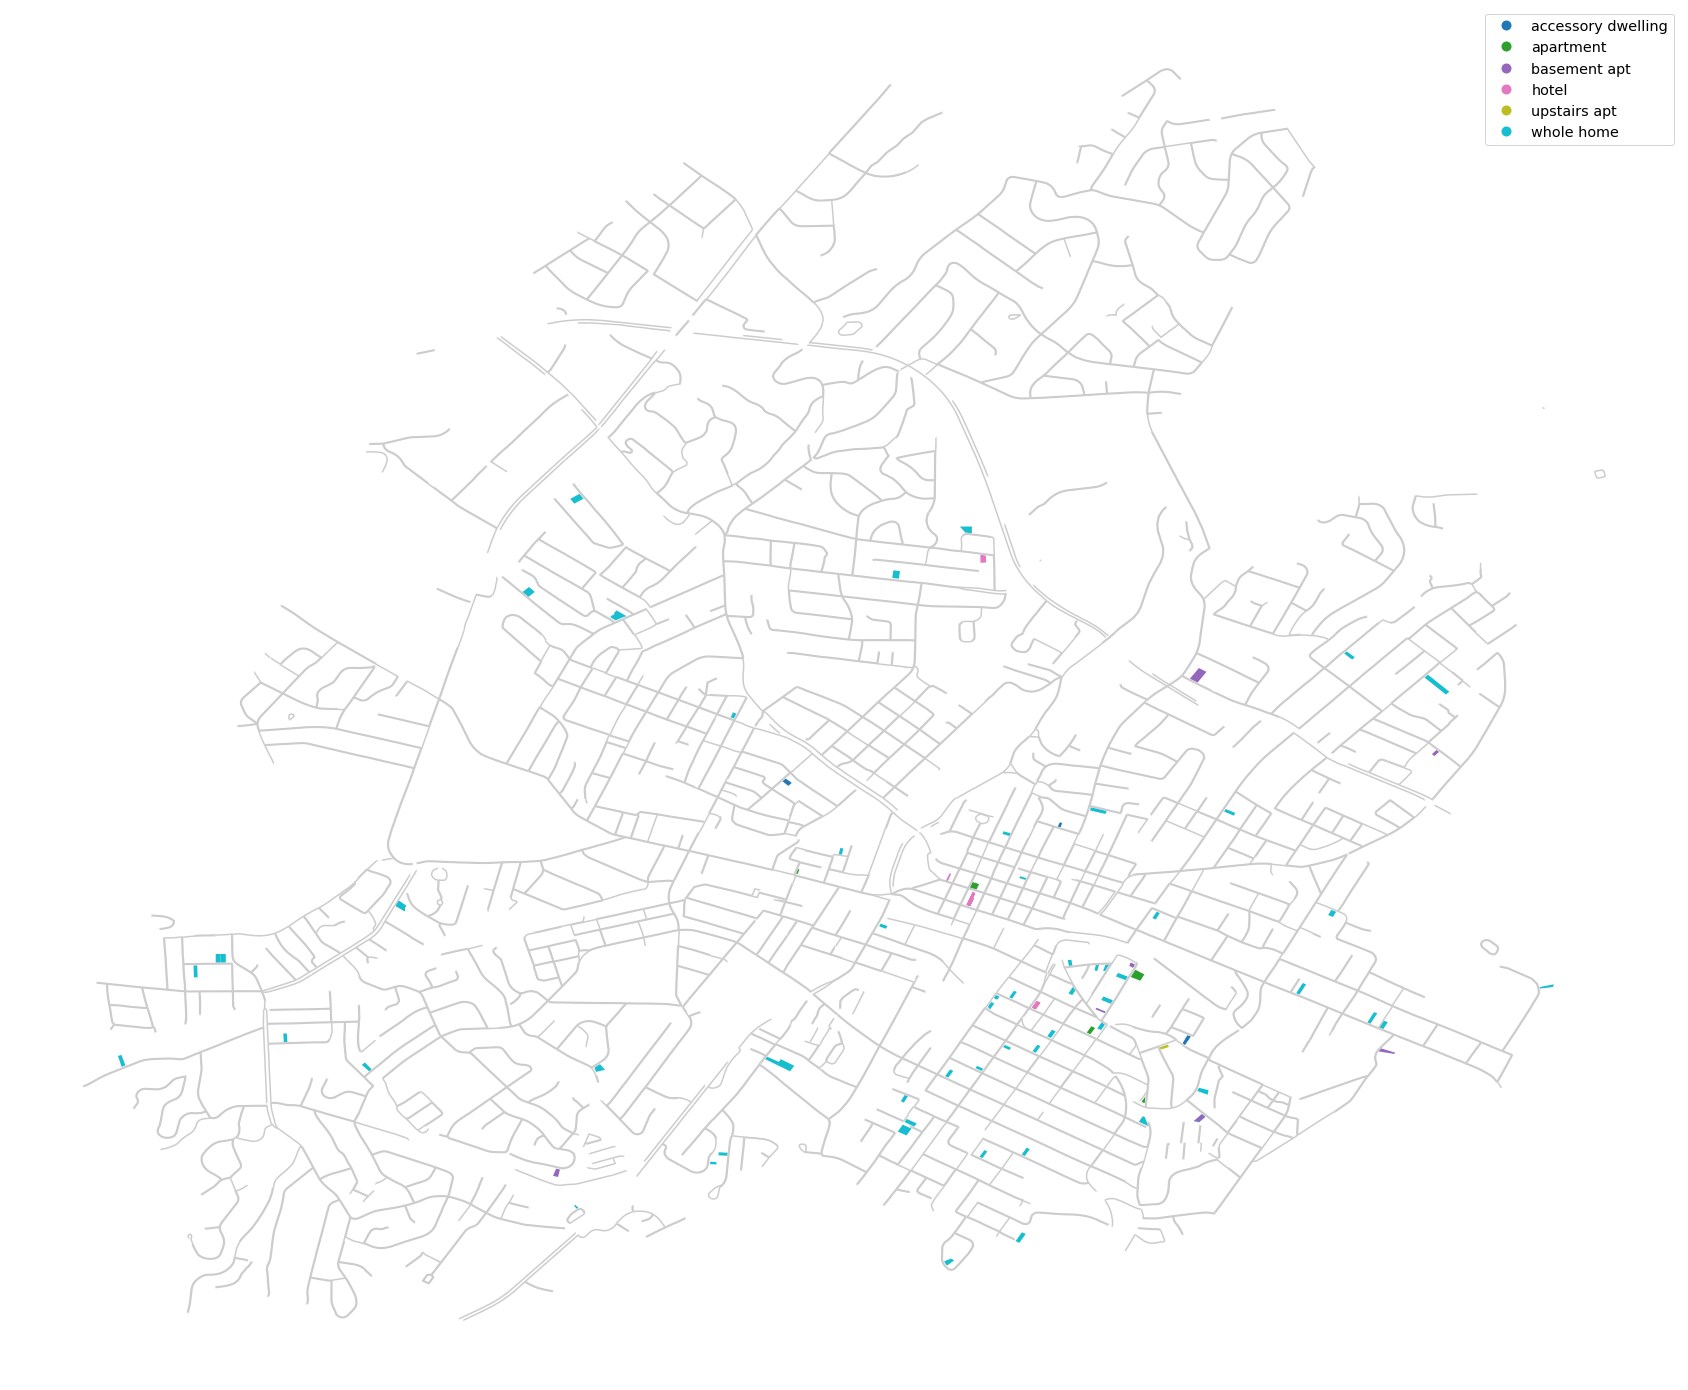

In [4]:
# merge the AirBnB list and city parcels based on the address columns with number and street
parcels_and_airbnb = pd.merge(airbnb_list, cville_parcels, left_on='address', right_on='fulladdress', how='left')
not_mapped = parcels_and_airbnb[parcels_and_airbnb.fulladdress.isnull()]
print (not_mapped)

#read the Cville Streets file to give things more context in the plot
cville_streets = gpd.read_file('https://opendata.arcgis.com/datasets/e5a3e226dd9d4399aa014858f489852a_60.geojson')

# find those addresses that show up post merge more than twice....those are probaby hotels, so change their type
parcels_and_airbnb['address_count'] = parcels_and_airbnb.groupby('address').address.transform('count')
parcels_and_airbnb.loc[parcels_and_airbnb['address_count'] > 2, 'type'] = 'hotel'

# make it so we can map the merged data frame again
airbnb_to_map = gpd.GeoDataFrame(parcels_and_airbnb, geometry ='geometry')

# make pretty plot big enough to see with street and AirBnB addresses where color relates to type of rental. Give a legend, turn off plot axes
fig, ax = plt.subplots(figsize=(30,30))
cville_streets.plot(ax=ax, color='0.8')
airbnb_to_map.plot(ax=ax, column='type', legend=True, legend_kwds={'fontsize':'x-large'})
plt.axis('off')
plt.show()
